# Deep learning from scratch: homework 3

### General instructions

Complete the exercises listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells.  

Included with the notebook are 

- a custom utilities file called `custom_utils.py` that provides various plotting functionalities (for unit tests to help you debug) as well as some other processing code


- datasets for exercises: `unnorm_linregress_data.csv`, `highdim_multirange_linregress.csv`, `student_debt.csv`, and  `noisy_sin_sample.csv`

be sure you have these files located in the same directory where you put this notebook to work!

### When submitting this homework:
    
**Make sure all output is present in your notebook prior to submission**

In [1]:
# import autograd functionality
import autograd.numpy as np
from autograd.util import flatten_func
from autograd import grad as compute_grad   

# import custom utilities
import custom_utilities as util

# import various other libraries
import copy
import matplotlib.pyplot as plt

# this is needed to compensate for %matplotl+ib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%matplotlib notebook
%load_ext autoreload
%autoreload 2

Feel free to use the following ``gradient_descent`` function below for this exercise.

In [2]:
# gradient descent function
def gradient_descent(g,w,alpha,max_its,beta,version):    
    # flatten the input function, create gradient based on flat function
    g_flat, unflatten, w = flatten_func(g, w)
    grad = compute_grad(g_flat)

    # record history
    w_hist = []
    w_hist.append(unflatten(w))

    # start gradient descent loop
    z = np.zeros((np.shape(w)))      # momentum term
    
    # over the line
    for k in range(max_its):   
        # plug in value into func and derivative
        grad_eval = grad(w)
        grad_eval.shape = np.shape(w)

        ### normalized or unnormalized descent step? ###
        if version == 'normalized':
            grad_norm = np.linalg.norm(grad_eval)
            if grad_norm == 0:
                grad_norm += 10**-6*np.sign(2*np.random.rand(1) - 1)
            grad_eval /= grad_norm
            
        # take descent step with momentum
        z = beta*z + grad_eval
        w = w - alpha*z

        # record weight update
        w_hist.append(unflatten(w))

    return w_hist

#### <span style="color:#a50e3e;">Exercise 2. </span>  Normalizing the input of a student debt dataset

The cell below loads in and visualizes a student debt dataset.  Here the input is in increments of time, and the output is the corresponding total amount of student debt held in the United States.

<IPython.core.display.Javascript object>


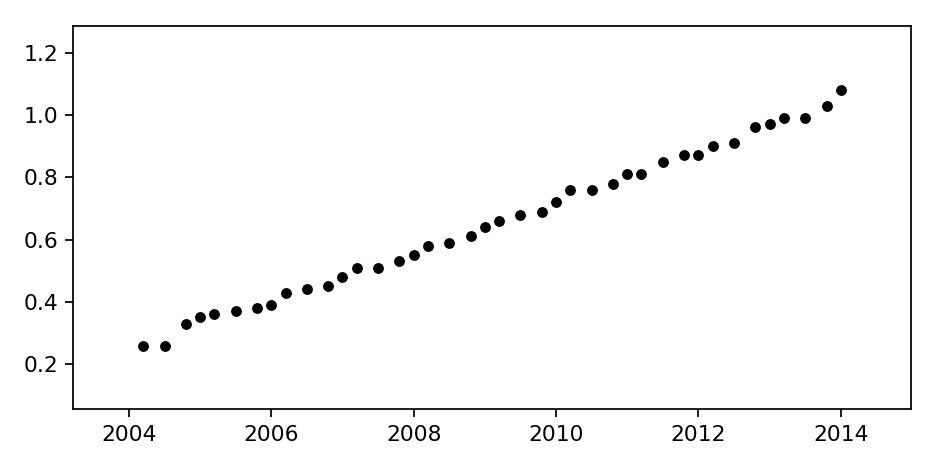

In [3]:
# load data
data = np.loadtxt('student_debt.csv',delimiter = ',')
x = data[:,:-1]
y = data[:,-1:]

# make copy of input and output (for later)
x_orig = copy.deepcopy(x)
y_orig = copy.deepcopy(y)
# y_orig = copy.deepcopy(y)
y_mean = np.mean(y)
y_std = np.std(y)

# plot everything
demo = util.Visualizer()
demo.plot_data_fit(x,y)

**TO DO**

Compare the performance of gradient descent in tuning the Least Squares cost function on this dataset when you use the raw dataset versus when you normalize the input.  Use only $25$ iterations of gradient descent in each instance, and in each instance use the largest steplength value $\alpha$ of the form $10^{-\gamma}$ (where $\gamma$ is a positive integer) that produces convergence.  Use an initial point $\mathbf{w}^0 = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$.

**You should turn in:**
    
**1)** a contour plot in each instance with gradient descent path drawn on top (as shown in ``Exercise 1``


**2)** a cost function plot for each run of gradient descent



**3)** a short explanation summarizing what input normalization has done in this instance in terms of speeding up gradient descent

**Hint:**

Feel free to steal useful code chunks from the previous exercise!

<IPython.core.display.Javascript object>


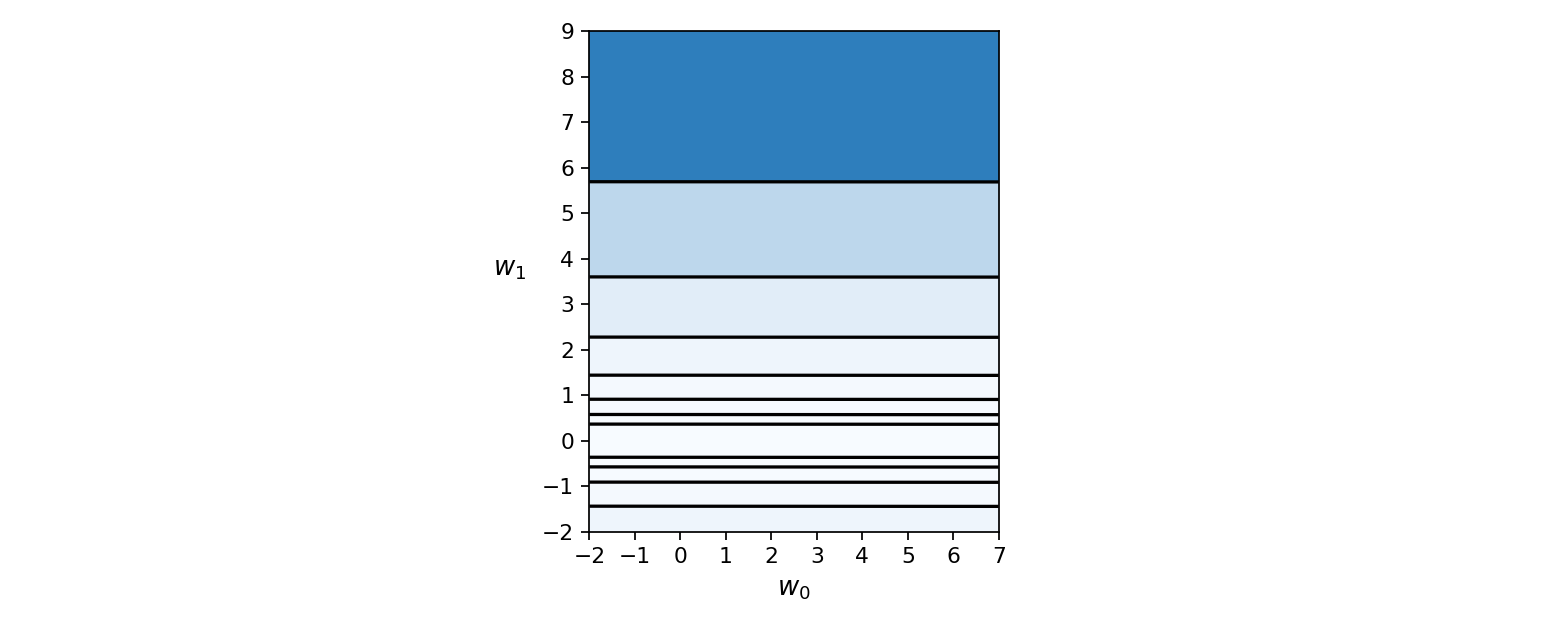

In [4]:
# make our predict function
def predict(x,w):
    return w[0] + x*w[1]

# make predictions for the entire set of inputs simultaneously
w = np.random.randn(2,1)   # make random weights for our prediction
# print (w)
# w = np.zeros([2, 1])
# w = [[0][0]]
# print (w)
# least squares
least_squares = lambda w: np.sum((predict(x,w) - y)**2)

# plot contour of cost
demo.draw_setup(least_squares, num_contours = 7,xmin = -2,xmax = 7,ymin = -2,ymax = 9)

C:\Users\hegde\AppData\Local\conda\conda\envs\py36\lib\site-packages\autograd\core.py:81: RuntimeWarning: overflow encountered in power
  result_value = self.fun(*argvals, **kwargs)
C:\Users\hegde\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in square
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


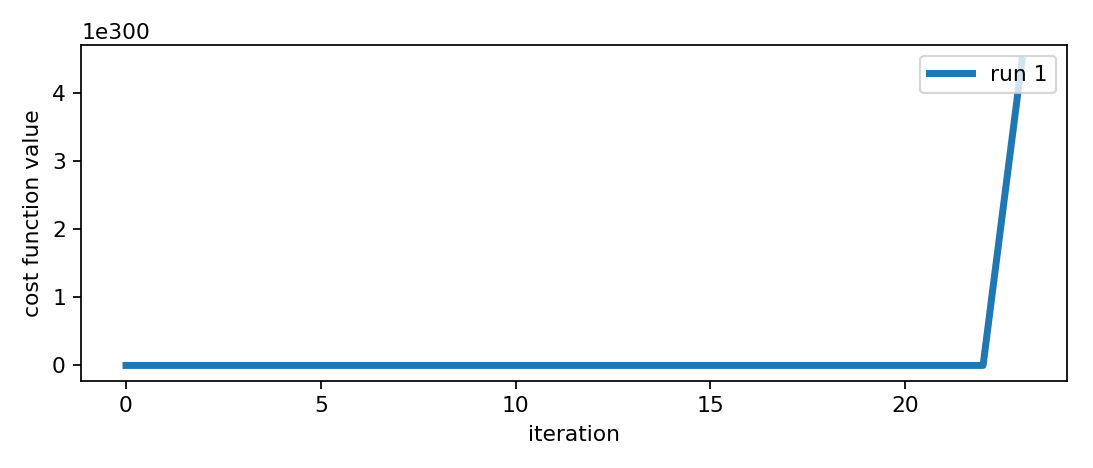

In [5]:
# run gradient descent initialized at 0
alpha = 10**(-2)
max_its = 25
w_init = np.zeros((2,1))

# run gradient descent
weight_history = gradient_descent(least_squares,w_init,alpha,max_its,beta = 0,version = 'unnormalized')

# plot cost function history
cost_history = [least_squares(v) for v in weight_history]
histories = [cost_history]
demo.compare_regression_histories(histories)

[array([[ 0.],
       [ 0.]]), array([[  5.22200000e-01],
       [  1.04970112e+03]]), array([[ -1.68718398e+06],
       [ -3.38977053e+09]]), array([[  5.44837783e+12],
       [  1.09464947e+16]]), array([[ -1.75942999e+19],
       [ -3.53492208e+22]]), array([[  5.68167991e+25],
       [  1.14152287e+29]]), array([[ -1.83476960e+32],
       [ -3.68628909e+35]]), array([[  5.92497209e+38],
       [  1.19040342e+42]]), array([[ -1.91333529e+45],
       [ -3.84413771e+48]]), array([[  6.17868216e+51],
       [  1.24137704e+55]]), array([[ -1.99526520e+58],
       [ -4.00874548e+61]]), array([[  6.44325621e+64],
       [  1.29453339e+68]]), array([[ -2.08070339e+71],
       [ -4.18040183e+74]]), array([[  6.71915945e+77],
       [  1.34996591e+81]]), array([[ -2.16980008e+84],
       [ -4.35940859e+87]]), array([[  7.00687699e+90],
       [  1.40777208e+94]]), array([[ -2.26271193e+097],
       [ -4.54608050e+100]]), array([[  7.30691473e+103],
       [  1.46805354e+107]]), array([[ -2.3

<IPython.core.display.Javascript object>


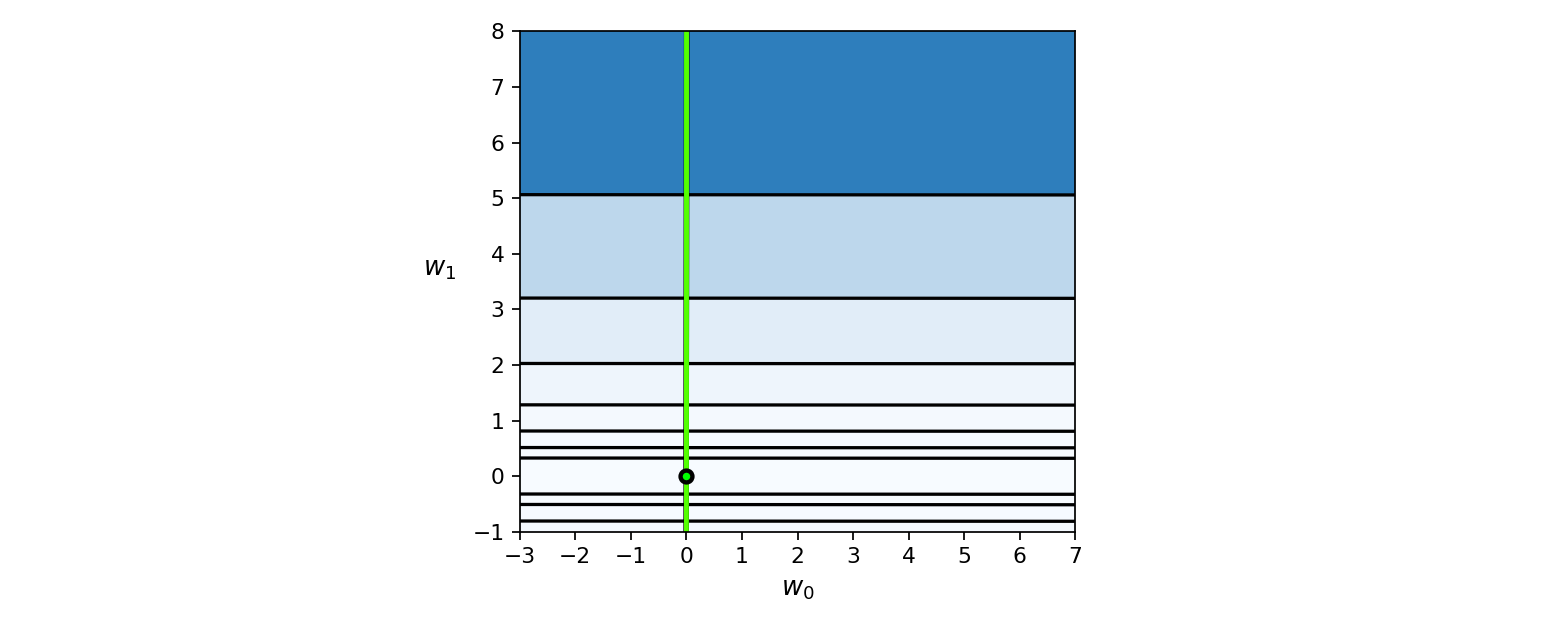

C:\Users\hegde\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in square
  if sys.path[0] == '':


In [6]:
# plot history on contours
print (weight_history)
demo.draw_setup(least_squares,num_contours = 7,weight_history = weight_history, xmin = -3,xmax = 7,ymin = -1,ymax = 8)

<IPython.core.display.Javascript object>


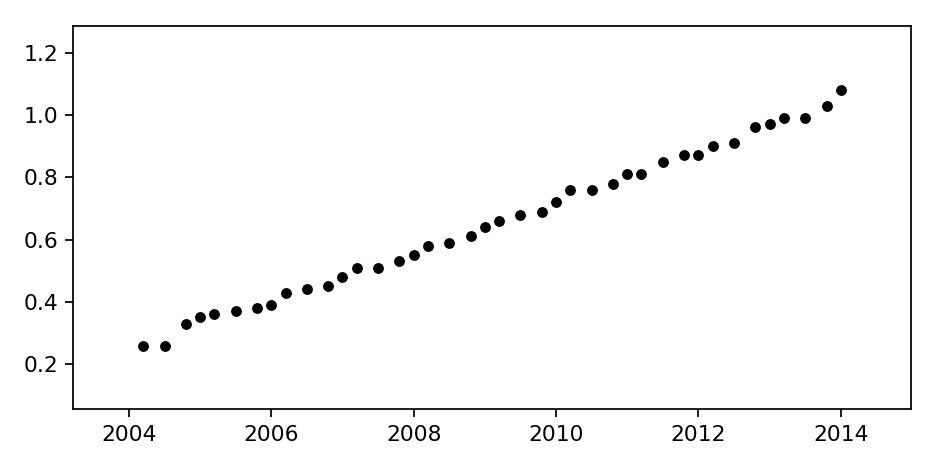

In [7]:
# the original data and best fit line learned from our gradient descent run
w = weight_history[-1]  # take the final weight learned from our history
demo.plot_data_fit(x,y,predict = predict,weights = w)

<IPython.core.display.Javascript object>


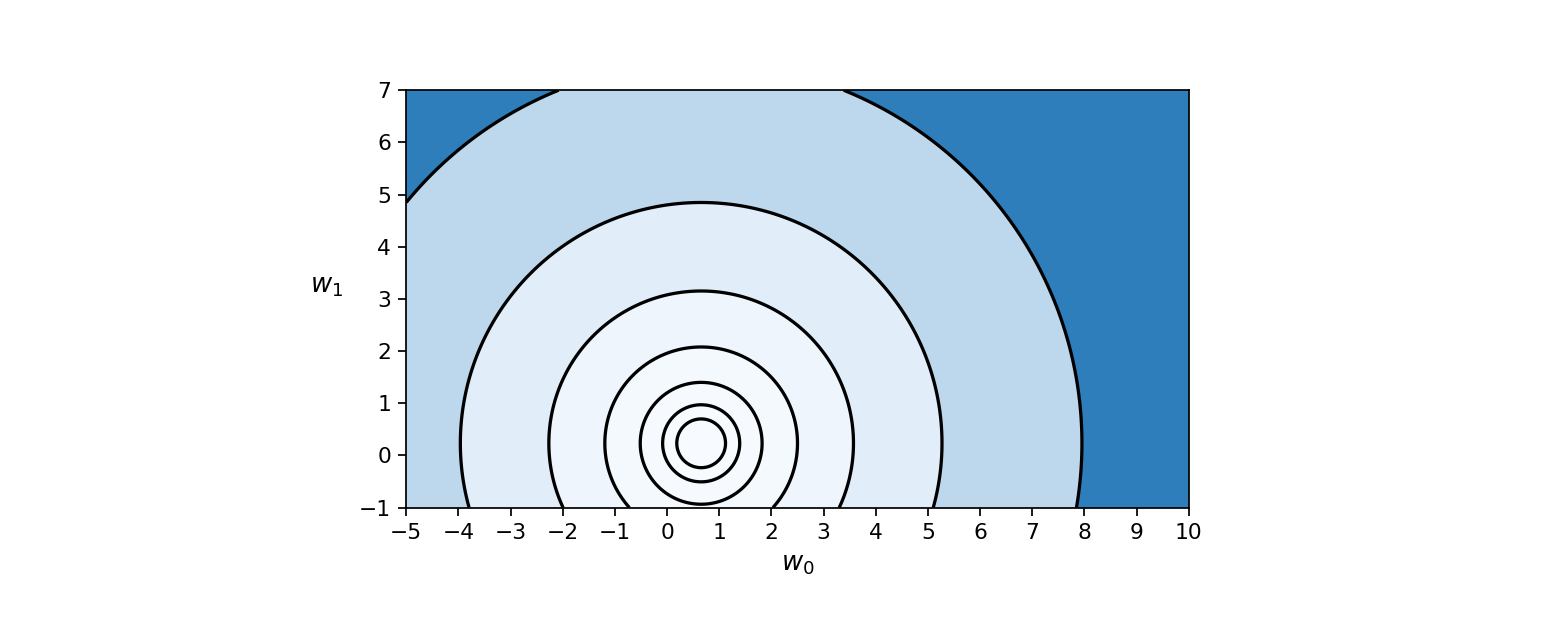

In [8]:
# compute the mean and standard deviation of the input
x_mean = np.mean(x)
x_std = np.std(x)

# a normalization function 
def normalize(data,data_mean,data_std):
    normalized_data = (data - data_mean)/data_std
    return normalized_data

# cache a copy of the original input, then normalize
x_orig = copy.deepcopy(x)
x = normalize(x,x_mean,x_std)

# show contour plot
demo.draw_setup(least_squares,num_contours = 7, xmin = -5,xmax = 10,ymin = -1,ymax = 7)

<IPython.core.display.Javascript object>


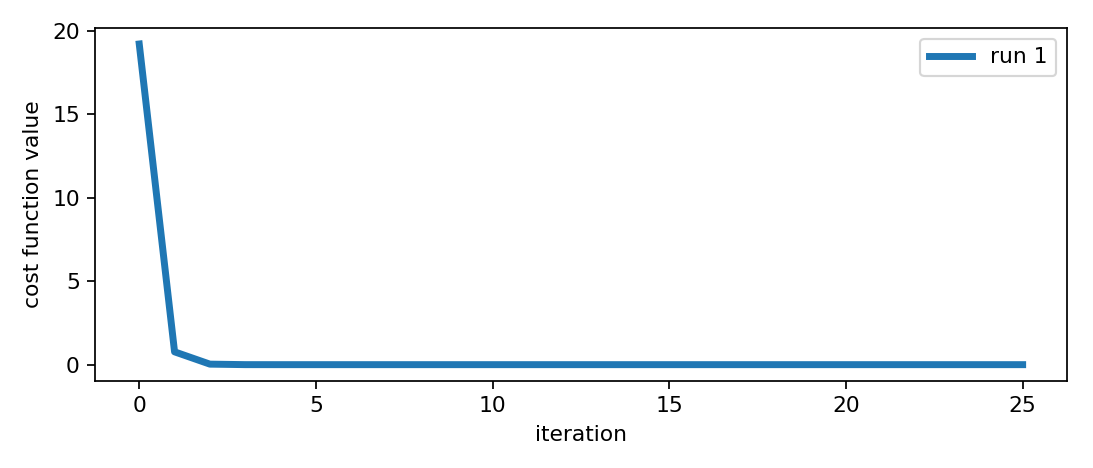

In [9]:
# run gradient descent initialized at 0
alpha = 10**(-2)
max_its = 25
w_init = np.zeros((2,1))

# run gradient descent
weight_history = gradient_descent(least_squares,w_init,alpha,max_its,beta = 0,version = 'unnormalized')

# plot cost function history
cost_history = [least_squares(v) for v in weight_history]
histories = [cost_history]
demo.compare_regression_histories(histories)

<IPython.core.display.Javascript object>


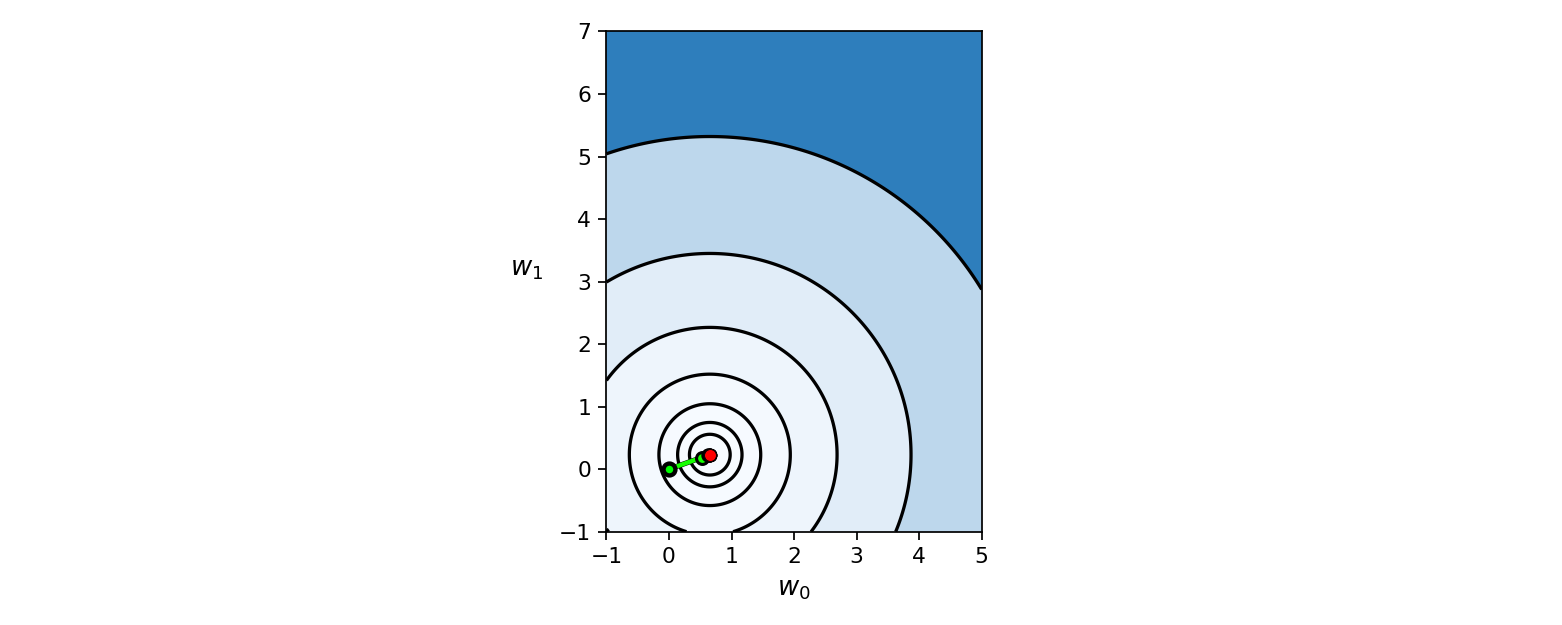

In [10]:
# plot history on contours
demo.draw_setup(least_squares,num_contours = 7,weight_history = weight_history, xmin = -1,xmax = 5,ymin = -1,ymax = 7)

<IPython.core.display.Javascript object>


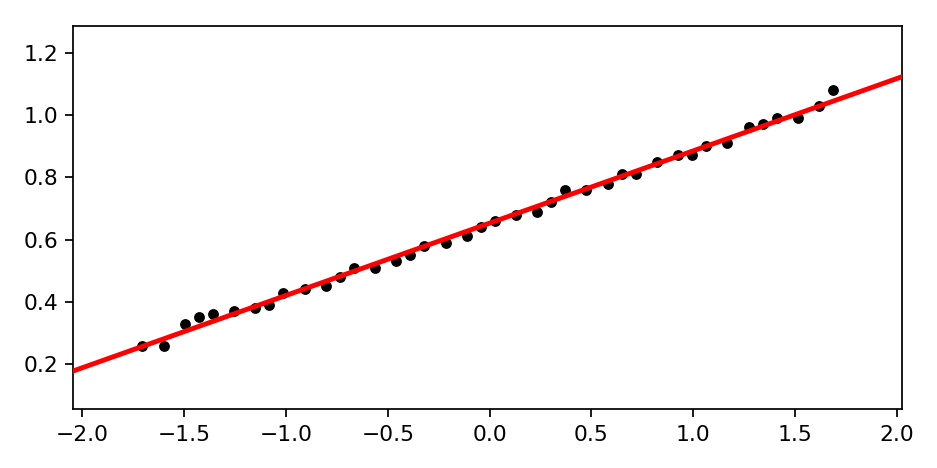

In [11]:
# the original data and best fit line learned from our gradient descent run
w = weight_history[-1]  # take the final weight learned from our history
demo.plot_data_fit(x,y,predict = predict,weights = w)

<IPython.core.display.Javascript object>


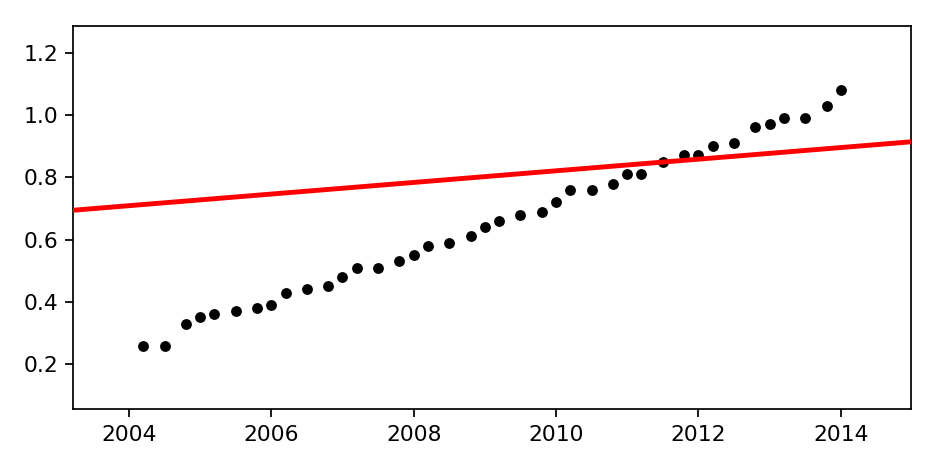

In [14]:
def predict_testing(x,w):
    # normalize data
    x_normed = normalize(x,x_mean,x_std)
    
    # compute linear model
    vals = w[0] + x_normed*w[1]
    
    # re-normalize from output
    vals = vals*y_std + y_mean
    return vals

# plot best fit line to original data - x_orig
x = copy.deepcopy(x_orig)  # re-assign our original input to the variable 'x'
y = copy.deepcopy(y_orig)  # re-assign our original input to the variable 'x'
# y_orig = copy.deepcopy(y)
# y_mean = np.mean(y)
# y_std = np.std(y)
demo.plot_data_fit(x,y,predict = predict_testing,weights = weight_history[-1])

In [13]:
# a short explanation summarizing what input normalization has done in this instance in terms of speeding up gradient descent
# How circular its contours are (!) - this is due to the fact that input-normalization has forced the cost function to
# treat the slope and bias more equivalently (it is no longer more sensitive to the value of one over the other). 
# Doing input normalization has allowed us to reach a minimum cost value with a much greater value of alpha (learning rate)
# Before doing normalization, in order to see a slope, alpha had to be 10^-9, but after normalization, we got 10^-2
# And also, we reached this in a much smaller number of iterations when compared to the previous run
# Working with a larger alpha value also decreases some computational complexity (working with floating point vs double complexity)
# These are the benefits of input normalization.